In [1]:
import numpy as np
import dualitic as dl
import matplotlib.pyplot as plt

In [9]:
def ode(X, a=1.1, b=0.4, c=0.1, d=0.4):
    x, y = X
    dxdt = a * x - b * x * y
    dydt = c * x * y - d * y

    return dxdt, dydt

In [28]:
def solve(T, x0, dt=0.01, **kwargs):
    t = 0
    x = [x0[0]]
    y = [x0[1]]
    while t < T:
        dxdt, dydt = ode([x[-1], y[-1]], **kwargs)
        _x = x[-1] + dt * dxdt
        _y = y[-1] + dt * dydt
        x.append(_x)
        y.append(_y)
        t += dt

    return x, y

In [41]:
x, y = solve(200, [10, 10], a=dl.DualNumber(5, [1]))

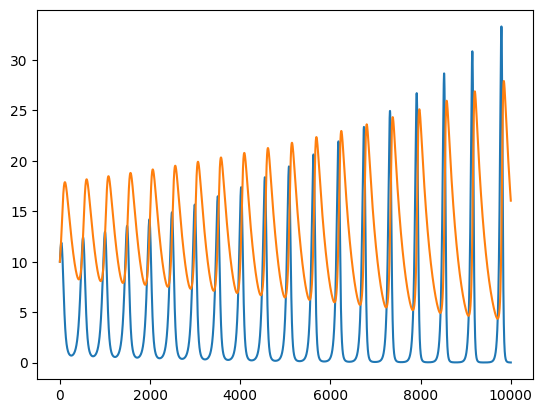

In [42]:
plt.plot([_x.real for _x in x])
plt.plot([_y.real for _y in y])
# plt.plot(y.real)

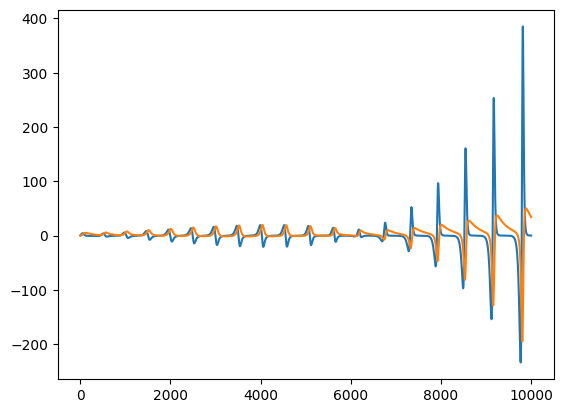

In [43]:
plt.plot([_x.dual[0] for _x in x[1:]])
plt.plot([_y.dual[0] for _y in y[2:]])